In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

# 1. Load meta-data from JSON files

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/census/metadata.json")

# 2. Load data from CSV files

In [3]:
import pandas as pd

data = {
    "census": pd.read_csv("../datasets/census/census.csv")
}

# 3. Initialize a `Dataset` instance

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Select and train a data synthesizer

In [5]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data, epochs=10)

table census start training
epoch 0: train loss 45.553, time cost 6.001s
epoch 1: train loss 41.382, time cost 6.007s
epoch 2: train loss 36.608, time cost 5.975s
epoch 3: train loss 33.078, time cost 5.930s
epoch 4: train loss 30.884, time cost 5.968s
epoch 5: train loss 30.207, time cost 5.939s
epoch 6: train loss 29.558, time cost 5.949s
epoch 7: train loss 28.936, time cost 5.939s
epoch 8: train loss 28.881, time cost 5.948s
epoch 9: train loss 28.526, time cost 5.934s
table census training completed, time cost 59.595s


# 5. Generate synthetic data using the data synthesizer

In [6]:
sampled_data = synthesizer.sample()

# 6. Evaluate the synthetic data using various metrics

In [10]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(data["census"], sampled_data["census"])

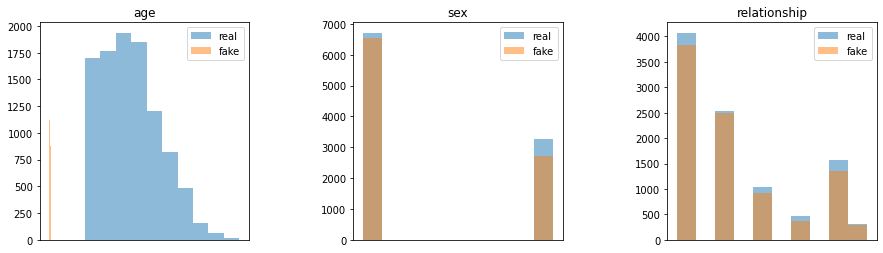

In [11]:
evaluator.eval_histogram(columns=["age", "sex", "relationship"])

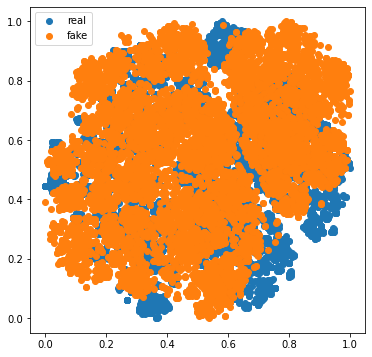

In [9]:
evaluator.eval_tsne()